Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [ ]:
dataset = pd.read_csv('/content/name_gender_dataset.csv')

Exploratory Data Analysis

Sample of the Dataset

In [ ]:
dataset.head()

,Name,Gender,Count,Probability
0,James,M,5304407,0.014517
1,John,M,5260831,0.014398
2,Robert,M,4970386,0.013603
3,Michael,M,4579950,0.012534
4,William,M,4226608,0.011567


Colunm names and Data types of the Attributes

In [ ]:
print(dataset.columns)

Index(['Name', 'Gender', 'Count', 'Probability'], dtype='object')


In [ ]:
print(dataset.dtypes)

Name            object
Gender          object
Count            int64
Probability    float64
dtype: object


The shape of the Data

In [ ]:
print(dataset.shape)

(147269, 4)


Analyzing the starting letter of the names

In [ ]:
alphabets= ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P',

            'Q','R','S','T','U','V','W','X','Y','Z']

startletter_count = {}

for i in alphabets:

    startletter_count[i] = len(dataset[dataset['Name'].str.startswith(i)])

print(startletter_count)

{'A': 15042, 'B': 5707, 'C': 8410, 'D': 9171, 'E': 5343, 'F': 2125, 'G': 3721, 'H': 3449, 'I': 2335, 'J': 11031, 'K': 11055, 'L': 8182, 'M': 11316, 'N': 5372, 'O': 1805, 'P': 3167, 'Q': 680, 'R': 7089, 'S': 12924, 'T': 9610, 'U': 487, 'V': 2428, 'W': 1499, 'X': 425, 'Y': 2181, 'Z': 2715}


Text(0.5, 1.0, 'Number of names starting with each letter')

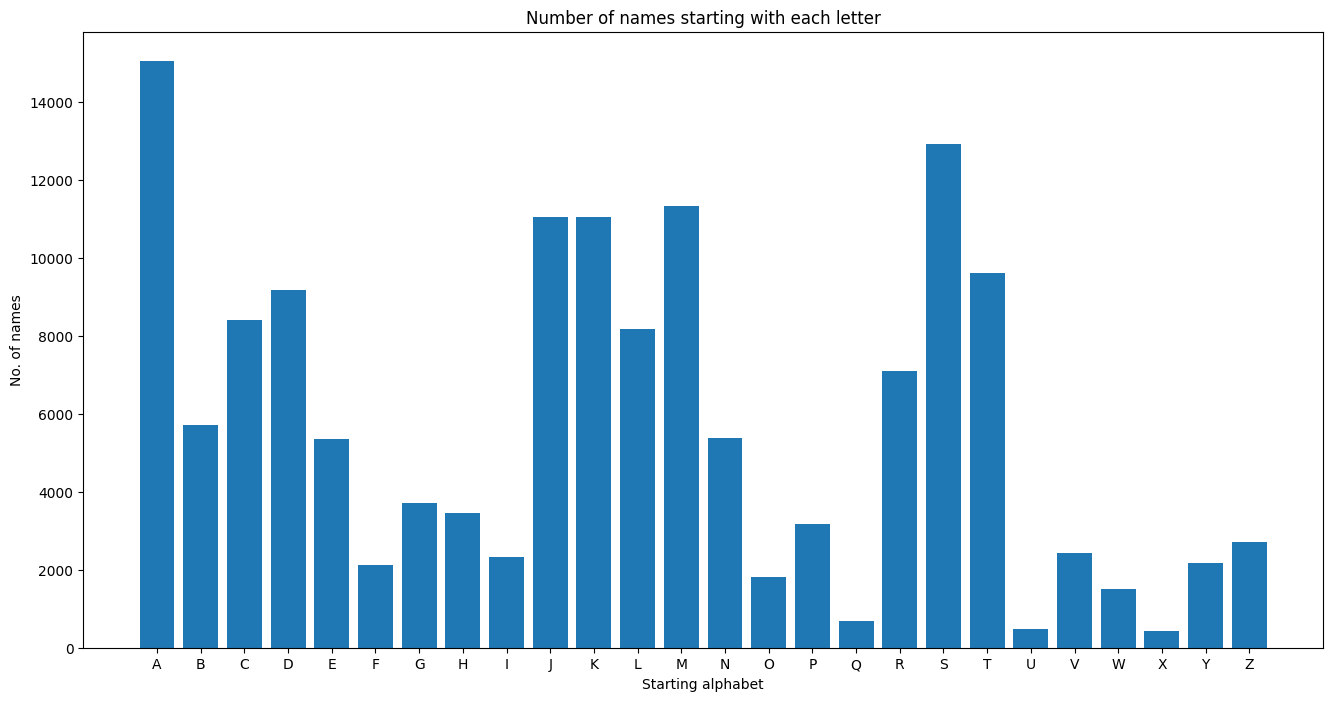

In [ ]:
plt.figure(figsize = (16,8))

plt.bar(startletter_count.keys(),startletter_count.values())

plt.xlabel('Starting alphabet')

plt.ylabel('No. of names')

plt.title('Number of names starting with each letter')

In [ ]:
print('The 5 most name starting letters are : ',

       *sorted(startletter_count.items(), key=lambda item: item[1])[-5:][::-1])


The 5 most name starting letters are :  ('A', 15042) ('S', 12924) ('M', 11316) ('K', 11055) ('J', 11031)


Analyzing the ending letter of the names

In [ ]:
small_alphabets = ['a','b','c','d','e','f','g','h',

                   'i','j','k','l','m','n','o','p','q','r','s','t','u','v','x','y','z']

endletter_count ={}

for i in small_alphabets:

    endletter_count[i]=len(dataset[dataset['Name'].str.endswith(i)])

print(endletter_count)

{'a': 38552, 'b': 469, 'c': 435, 'd': 2449, 'e': 24085, 'f': 281, 'g': 889, 'h': 8395, 'i': 8922, 'j': 390, 'k': 1499, 'l': 6622, 'm': 1947, 'n': 23310, 'o': 4196, 'p': 367, 'q': 97, 'r': 5151, 's': 5771, 't': 2651, 'u': 1202, 'v': 294, 'x': 292, 'y': 7821, 'z': 753}


Text(0.5, 1.0, 'Number of names ending with each letter')

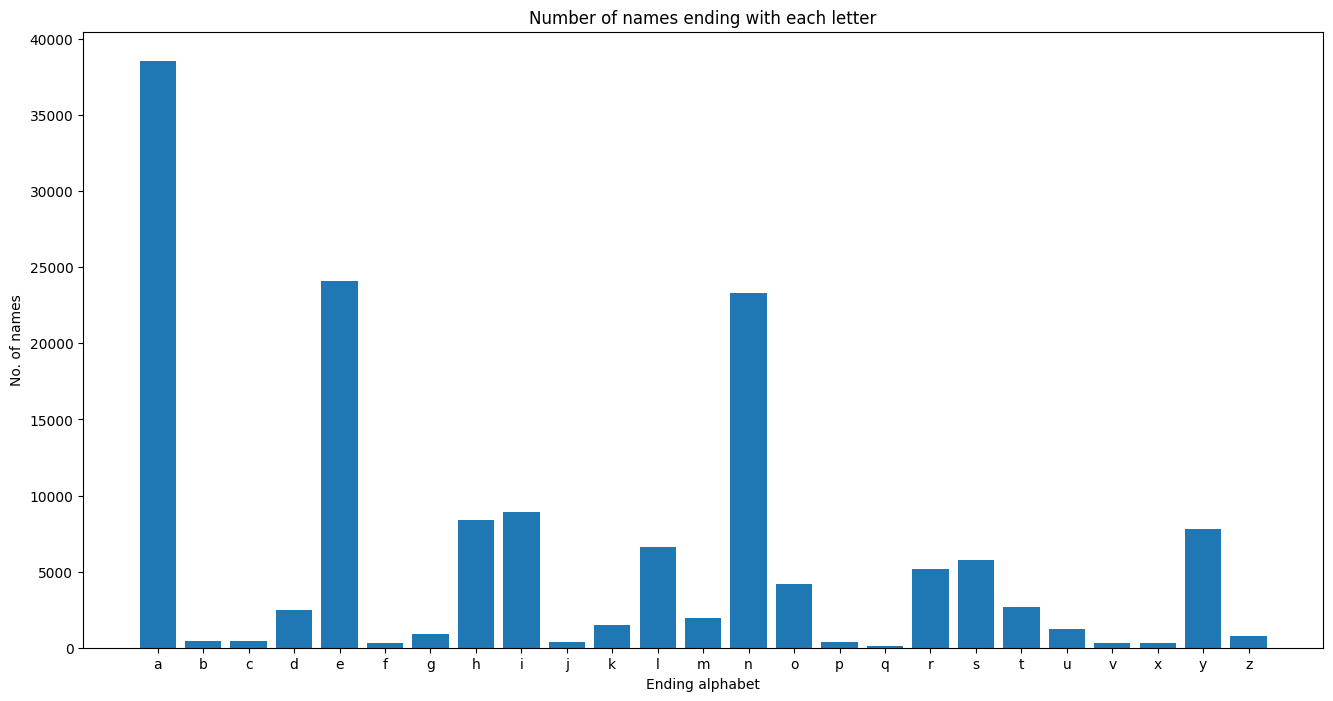

In [ ]:
plt.figure(figsize = (16,8))

plt.bar(endletter_count.keys(),endletter_count.values())

plt.xlabel('Ending alphabet')

plt.ylabel('No. of names')

plt.title('Number of names ending with each letter')

In [ ]:
print('The 5 most name endind letters are : ', *sorted(endletter_count.items(),

        key=lambda item: item[1])[-5:][::-1])

The 5 most name endind letters are :  ('a', 38552) ('e', 24085) ('n', 23310) ('i', 8922) ('h', 8395)


Text Preprocessing

In [ ]:
import string
import re
import nltk
import nltk.corpus
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Text Cleaning
def Text_Cleaning(Text):
  # Lowercase the texts
  Text = Text.lower()

  # Cleaning punctuations in the text
  punc = str.maketrans(string.punctuation, ' '*len(string.punctuation))
  Text = Text.translate(punc)

  # Removing numbers in the text
  Text = re.sub(r'\d+', '', Text)

  # Remove possible links
  Text = re.sub('https?://\S+|www\.\S+', '', Text)

  # Deleting newlines
  Text = re.sub('\n', '', Text)

  return Text

In [ ]:
# Stopwords
Stopwords = set(nltk.corpus.stopwords.words("english")) - set(["not"])

def Text_Processing(Text):
  Processed_Text = list()
  Lemmatizer = WordNetLemmatizer()

  # Tokens of Words
  Tokens = nltk.word_tokenize(Text)

  # Removing Stopwords and Lemmatizing Words
  # To reduce noises in our dataset, also to keep it simple and still 
  # powerful, we will only omit the word `not` from the list of stopwords

  for word in Tokens:
    if word not in Stopwords:
      Processed_Text.append(Lemmatizer.lemmatize(word))

  return(" ".join(Processed_Text))

In [ ]:
(lambda Text: Text_Cleaning(Text))
(lambda Text: Text_Processing(Text))

<function __main__.<lambda>(Text)>

In [ ]:
dataset.head

<bound method NDFrame.head of            Name Gender    Count   Probability
0         James      M  5304407  1.451679e-02
1          John      M  5260831  1.439753e-02
2        Robert      M  4970386  1.360266e-02
3       Michael      M  4579950  1.253414e-02
4       William      M  4226608  1.156713e-02
...         ...    ...      ...           ...
147264   Zylenn      M        1  2.736740e-09
147265   Zymeon      M        1  2.736740e-09
147266   Zyndel      M        1  2.736740e-09
147267   Zyshan      M        1  2.736740e-09
147268    Zyton      M        1  2.736740e-09

[147269 rows x 4 columns]>

In [ ]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag, ne_chunk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
X =list( dataset['Name'])

Y = list(dataset['Gender'])

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset['Name'].values
Y = dataset['Gender'].values

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.33,random_state=42)

In [ ]:
# Model Building
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Model Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
DTree = DecisionTreeClassifier()
LogReg = LogisticRegression()
SVC = SVC()
RForest = RandomForestClassifier()
Bayes = BernoulliNB()
KNN = KNeighborsClassifier()

Models = [DTree, LogReg, SVC, RForest, Bayes, KNN]
Models_Dict = {0: "Decision Tree", 1: "Logistic Regression", 2: "SVC", 3: "Random Forest", 4: "Naive Bayes", 5: "K-Neighbors"}

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(x_train)

X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)

Y_train = vectorizer.transform(y_train)
Y_test = vectorizer.transform(y_test)

In [ ]:
Classifier = LogisticRegression(random_state = 42, penalty = 'l2')
Classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
Prediction = Classifier.predict(X_test)

In [ ]:
Accuracy = Classifier.score(X_test, y_test)
print('Accuracy: ',Accuracy)

Accuracy:  0.5648058602028848
